## Importing pandas module


In [1]:
import pandas as pd

## Reading csv file into pandas dataframe

In [2]:
df = pd.read_csv('train_set.csv', encoding = 'unicode_escape')
print(df.head(10))

      label                                               text
0  85389000                 pdscpm gb part of panel of chiller
1  85389000  nm  p economical extended rot hand parts for c...
2  85389000  lv ma pd trip unit for cvs parts of circuit br...
3  85389000  lv na p trip unit for cvs switch parts of circ...
4  85389000  lv tmd pd trip unit for cvs parts of circuitbr...
5  85389000                              sleeve joint ip kseya
6  85389000                         a copper feeder lnpe kscpg
7  85389000                         a copper feeder lnpe kscpg
8  85389000  module tm analog outputs analog output expansi...
9  85389000  module tm io relays digital io expansion modul...


# Null Values
## Checking for null values if present

In [3]:
# Checking for the null values if present 
null_values = df.isnull().any(axis=1)
null_values

0        False
1        False
2        False
3        False
4        False
         ...  
23610    False
23611    False
23612    False
23613    False
23614    False
Length: 23615, dtype: bool

In [4]:
df[null_values]

,label,text


#### The above results show that there is no presence of null values

## Counting total number of words and data points

In [5]:
print("Total number of words in data : ", df['text'].apply(lambda x: len(x.split(' '))).sum())
print("Total number of rows  in data : " , len(df.index) )

Total number of words in data :  226029
Total number of rows  in data :  23615


# Labels

In [6]:
df.label.unique() #finding the labels

array([85389000, 85177090, 85369090, 39269099, 73181500, 85366990,
       85364900, 85238090, 87089900, 33041000, 87082900, 84713010])

In [7]:
labels = ['85389000', '85177090','85369090','39269099','73181500','85366990',
          '85364900', '85238090', '87089900', '33041000', '87082900', '84713010']

# Data Visualization
#### Visualization is done with Matplotlib 

85389000    2936
85177090    2581
85369090    2438
39269099    2189
73181500    2033
85366990    1944
85238090    1720
85364900    1714
87089900    1673
33041000    1605
87082900    1451
84713010    1331
Name: label, dtype: int64

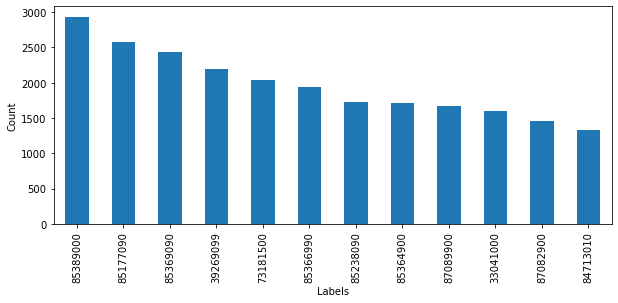

In [8]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,4))
plt.xlabel("Labels")
plt.ylabel("Count")

df.label.value_counts().plot(kind='bar');
df['label'].value_counts() # Checking the value counts for each labels

# Working with duplicated rows
#### Duplicated rows has no significance so we remove them 

In [9]:
# Checking for duplicated rows
duplicateRows = df[df.duplicated()]

In [10]:
len(duplicateRows) # calculating the total number of duplicated rows

12271

## Removing duplicated rows

In [11]:
# Since there are multiple rows duplicated , we must remove it
new_df = df.drop_duplicates()
# len(new_df) # total number of data points after removing duplicates
print("Total number of words in data after removing duplicated rows : ", new_df['text'].apply(lambda x: len(x.split(' '))).sum())

Total number of words in data after removing duplicated rows :  112053


In [12]:
print("Total number of rows in data : " , len(new_df.index) )

Total number of rows in data :  11344


## Looking at the distribution of data after removing duplicated rows

Total word count :  112053


39269099    1621
85177090    1610
85389000    1550
73181500    1271
85369090    1262
85366990    1032
87089900     794
84713010     562
33041000     547
87082900     547
85364900     455
85238090      93
Name: label, dtype: int64

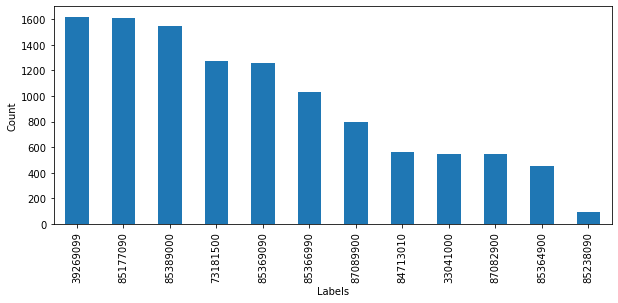

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.xlabel("Labels")
plt.ylabel("Count")

new_df.label.value_counts().plot(kind='bar');
# Now counting the labels value after removing duplicated rows
print("Total word count : ", new_df['text'].apply(lambda x: len(x.split(' '))).sum())
new_df['label'].value_counts()

# Looking at random data samples 

In [14]:
def print_sample_data(index):
    sample_data = new_df[new_df.index == index][['text', 'label']].values[0]
    if len(sample_data) > 0:
        print(sample_data[0])
        print('label:', sample_data[1])

print_sample_data(10)
print_sample_data(2000)

small controller panel for process controller based touch screen display hmiscub
label: 85389000
slteaa simatic s smart line module
label: 85389000


In [15]:
print("Total number of words in data  : ", new_df['text'].apply(lambda x: len(x.split(' '))).sum())

Total number of words in data  :  112053


# Data preprocessing 
### Removing stopwords, unwanted spacing , uppercase letter ,special symbols if any present

In [16]:
import nltk # nltk is an open source Python library for Natural Language Processing
import re  # The re module provides a set of powerful regular expression facilities
nltk.download("stopwords")
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
                
def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwords from text
    return text
  
print("Total number of words in data before preprocessing :", new_df['text'].apply(lambda x: len(x.split(' '))).sum())

new_df['text'] = new_df['text'].apply(clean_text)

print ("Total number of words in data after preprocessing :", new_df['text'].apply(lambda x: len(x.split(' '))).sum())

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/asimmahat/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total number of words in data before preprocessing : 112053
Total number of words in data after preprocessing : 86956


/tmp/ipykernel_47883/741654066.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text'] = new_df['text'].apply(clean_text)


# Spliting our data into training and testing set

In [17]:
from sklearn.model_selection import train_test_split
X = new_df.text
y = new_df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Exploring CountVectorizer and TFID vectorizer


In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vec = CountVectorizer(min_df = 2) # any word which comes < 2 is neglected
X_count_vec = count_vec.fit_transform(X_train)
print(X_count_vec.shape)

(9075, 4325)


In [19]:
tfidf_vec = TfidfVectorizer(min_df = 2)
X_tfidf_vec = tfidf_vec.fit_transform(X_train)
print(X_tfidf_vec.shape)

(9075, 4325)


### The input text is changed into n*m matrix of size (9075,4325) which is then passed
### to the model for training

# Using Multinominal Naive Bayes Classifier

In [20]:
# Using multinominal naive bayes for text classification

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_naive_bayes = Pipeline([('vect',TfidfVectorizer()),
                                ('clf', MultinomialNB()) ])
                  

model_naive_bayes.fit(X_train, y_train)
y_pred = model_naive_bayes.predict(X_test)

print('The accuracy of Naive Bayes model is :  %s' % accuracy_score(y_pred, y_test))
print ("-----------------------------------------------------------------------------")

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

print ("------------------------------------------------------------------------------")
print("Classification report")
print(classification_report(y_test, y_pred,target_names=labels))

The accuracy of Naive Bayes model is :  0.7977082415160864
-----------------------------------------------------------------------------
Confusion Matrix
[[ 96   1   0   0   0   0   0   0   0   0   0   0]
 [  0 275   9   1  17   0   0   2   6  11   3   5]
 [  0  21 212   1   7   0   0   0   2   2   0   2]
 [  0   6   0 107   2   0   0   0   0   0   0   0]
 [  0   5   1   0 309   0   0   0   1   3   0   0]
 [  0   8   0   0   0   6   0   0   1  14   0   0]
 [  0   1   1   0   1   0  51   0  24   6   1   0]
 [  0   9   1   0   1   0   0 131  41  12   0   0]
 [  0   9   4   0   2   0   4  33 196  16   0   1]
 [  0  21   4   0   7   0   1   9  18 265   0   0]
 [  0  14   1   0   0   0   0   0   0   2  56  28]
 [  0  28  17   0   4   0   0   0   1   1   5 106]]
------------------------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

    85389000       1.00      0.99      0.99        97
    85177090       0.69

# Using Random Forest Classifier

In [21]:
# Using Random Forest Clasifier for text classification

from sklearn.ensemble import RandomForestClassifier
model_rf_classifier = Pipeline([('vect', TfidfVectorizer()),
                                ('clf', RandomForestClassifier()) ])
model_rf_classifier.fit(X_train, y_train)

y_pred = model_rf_classifier.predict(X_test)

print('The accuracy of Random Forest Classifier model is :  %s' % accuracy_score(y_pred, y_test))
print("------------------------------------------------------------------------------------")

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print( "-----------------------------------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test, y_pred,target_names=labels))

The accuracy of Random Forest Classifier model is :  0.8457470251211988
------------------------------------------------------------------------------------
Confusion Matrix
[[ 97   0   0   0   0   0   0   0   0   0   0   0]
 [  2 260  17   2  10   0   0   4   5  16   3  10]
 [  1  15 221   1   1   0   0   1   1   1   1   4]
 [  0   6   0 108   0   0   0   0   0   0   0   1]
 [  0   5   1   0 308   0   0   0   1   4   0   0]
 [  0   2   1   0   0  24   0   0   2   0   0   0]
 [  0   2   0   0   0   0  75   1   3   3   0   1]
 [  0   3   1   0   1   0   2 152  26   9   0   1]
 [  0   9   3   0   1   0   7  28 208   7   1   1]
 [  0  17   6   1   1   0   7   5  22 265   0   1]
 [  0   6   0   0   0   0   0   0   0   0  78  17]
 [  0  19   4   0   1   0   0   0   0   3  12 123]]
-----------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

    85389000       0.97      1.00      0.98        9

# Balancing the data
#### - Previously we have build classifier model using imbalanced data .
#### - Now we try to balance the data and build classiifer models and see the accuracy differences.

## Looking at training and testing target statics

In [22]:
from collections import Counter
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({39269099: 1292, 85177090: 1291, 85389000: 1225, 73181500: 1024, 85369090: 997, 85366990: 837, 87089900: 632, 33041000: 450, 84713010: 447, 87082900: 446, 85364900: 370, 85238090: 64})
Testing target statistics: Counter({39269099: 329, 85389000: 325, 85177090: 319, 85369090: 265, 73181500: 247, 85366990: 195, 87089900: 162, 84713010: 115, 87082900: 101, 33041000: 97, 85364900: 85, 85238090: 29})


## Oversampling the smallest class

In [23]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)

In [24]:
X_train.shape
X_train

14517                      raxbal contactor industrial use
21834                     frzbbracket spares manufacturing
5944                pnvwaac logic extended card pf mfg ups
5116     non lte card agaa sr noypd ssyflccongi enh par...
8520                      pu cover xiaomi redmi note brown
                               ...                        
23454    notebook computerassybaseiurmn nopgbis norkpwf...
8915                    pph sheet colour white size mm pcs
9181                                   kickstand case ipad
1415                                raba connecting module
12068                   swivel eyebolt ring x cd art c pcs
Name: text, Length: 9075, dtype: object

In [25]:
X_train = X_train.values.reshape(-1,1)

In [26]:
X_train.shape

(9075, 1)

In [27]:
X_train

array([['raxbal contactor industrial use'],
       ['frzbbracket spares manufacturing'],
       ['pnvwaac logic extended card pf mfg ups'],
       ...,
       ['kickstand case ipad'],
       ['raba connecting module'],
       ['swivel eyebolt ring x cd art c pcs']], dtype=object)

In [28]:
X_train_balanced, y_train_balanced = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_train_balanced)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({85364900: 1292, 87082900: 1292, 85369090: 1292, 85177090: 1292, 39269099: 1292, 85389000: 1292, 87089900: 1292, 73181500: 1292, 85366990: 1292, 84713010: 1292, 33041000: 1292, 85238090: 1292})
Testing target statistics: Counter({39269099: 329, 85389000: 325, 85177090: 319, 85369090: 265, 73181500: 247, 85366990: 195, 87089900: 162, 84713010: 115, 87082900: 101, 33041000: 97, 85364900: 85, 85238090: 29})


In [29]:
# from imblearn.over_sampling import SMOTE
# over_sampler = SMOTE(k_neighbors=2)
# print(f"Training target statistics: {Counter(y_res)}")
# print(f"Testing target statistics: {Counter(y_test)}")

In [30]:
X_train_balanced_s  = pd.Series(X_train_balanced.reshape(-1))
X_train_balanced_s.head()
# y_train_balanced

0                      raxbal contactor industrial use
1                     frzbbracket spares manufacturing
2               pnvwaac logic extended card pf mfg ups
3    non lte card agaa sr noypd ssyflccongi enh par...
4                     pu cover xiaomi redmi note brown
dtype: object

## Using multinominal naive bayes classifier for balanced data

In [31]:
# Using multinominal naive bayes for text classification

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_naive_bayes_balanced = Pipeline([('vect',TfidfVectorizer()),
                             ('clf', MultinomialNB()) ])
                  

model_naive_bayes_balanced.fit(X_train_balanced_s, y_train_balanced)
y_pred = model_naive_bayes_balanced.predict(X_test)

print('The accuracy of Naive Bayes model is :  %s' % accuracy_score(y_pred, y_test))
print ("-----------------------------------------------------------------------------")

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

print ("------------------------------------------------------------------------------")
print("Classification report")
print(classification_report(y_test, y_pred,target_names=labels))

The accuracy of Naive Bayes model is :  0.8016747465843984
-----------------------------------------------------------------------------
Confusion Matrix
[[ 97   0   0   0   0   0   0   0   0   0   0   0]
 [  1 233  15   3  17   2   0   4  10   9  27   8]
 [  5  10 208   1   3   1   0   1   3   0   2  13]
 [  0   2   0 113   0   0   0   0   0   0   0   0]
 [  0   5   3   0 305   0   0   1   1   3   0   1]
 [  0   1   0   0   0  26   0   0   0   1   0   1]
 [  0   0   0   0   0   0  79   1   0   2   1   2]
 [  2   2   0   0   0   1   7 152  25   6   0   0]
 [  1   3   3   1   1   0  29  52 164   6   4   1]
 [  2   9   9   1   4   2   7  16  22 240   2  11]
 [  2   2   1   0   0   0   0   0   0   0  85  11]
 [  1   2   8   0   0   2   0   0   0   0  32 117]]
------------------------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

    85389000       0.87      1.00      0.93        97
    85177090       0.87

## Using random forest classifer for balanced data

In [32]:
# Using Random Forest Clasifier for text classification

from sklearn.ensemble import RandomForestClassifier
model_rf_classifier_balanced = Pipeline([('vect', TfidfVectorizer()),
                                ('clf', RandomForestClassifier()) ])
model_rf_classifier_balanced.fit(X_train_balanced_s, y_train_balanced)

y_pred = model_rf_classifier_balanced.predict(X_test)

print('The accuracy of Random Forest Classifier model is :  %s' % accuracy_score(y_pred, y_test))
print("------------------------------------------------------------------------------------")

print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print( "-----------------------------------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test, y_pred,target_names=labels))

The accuracy of Random Forest Classifier model is :  0.8386954605553107
------------------------------------------------------------------------------------
Confusion Matrix
[[ 97   0   0   0   0   0   0   0   0   0   0   0]
 [  2 253  16   2  11   0   0   5   6  13   7  14]
 [  1  13 223   1   0   0   0   1   1   1   2   4]
 [  0   7   0 108   0   0   0   0   0   0   0   0]
 [  0   4   2   0 306   0   1   0   1   4   1   0]
 [  0   3   0   0   0  24   0   1   1   0   0   0]
 [  0   0   0   0   0   0  75   3   3   3   0   1]
 [  0   4   1   0   1   0   2 157  22   7   0   1]
 [  0   7   4   0   2   0  20  26 200   5   1   0]
 [  0  20   5   0   1   0   7   6  23 258   0   5]
 [  0   6   0   0   0   0   0   1   0   0  79  15]
 [  0  16   5   0   1   0   0   0   0   4  13 123]]
-----------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

    85389000       0.97      1.00      0.98        9

# Comparision on different models 

## Accuracy on Imbalanced data :
   #### - Multinominal Naive bayes classifier (model_naive_bayes) : 0.7977
   #### - Random Forest Classifer (model_rf_classifier) : 0.8422

## Accuracy on Balanced data :
   #### - Multinominal Naive bayes classifier (model_naive_bayes_balanced) : 0.8016
   #### - Random Forest Classifer (model_rf_classifier_balanced) : 0.8373
   
# Result : 
#### There is no significant difference in accuracy

# Now checking the classifier model in "test_set.csv" 

In [33]:
df_test = pd.read_csv("test_set.csv", encoding = 'unicode_escape') 

In [34]:
df_test.head()

,text
0,lv tmd pd trip unit for nh parts of circuit br...
1,module tm analog outputs analog output expansi...
2,command group t iii mechanismt p parts forcir...
3,parts of relayelectrical contact issu e f xxup
4,parts for programmable logic controllers dm ...


In [35]:
len(df_test)

5894

## Data preprocessing 

In [36]:
# Checking for the null values if present 
null_values = df_test.isnull().any(axis=1)
null_values

0       False
1       False
2       False
3       False
4       False
        ...  
5889    False
5890    False
5891    False
5892    False
5893    False
Length: 5894, dtype: bool

In [37]:
df_test[null_values]

,text


#### There is no present of null values 

### Checking for duplicate rows

In [38]:
duplicateRows_test = df_test[df_test.duplicated()]

In [39]:
len(duplicateRows_test)

2045

#### Removing duplicate rows

In [40]:
new_df_test = df_test.drop_duplicates()

In [41]:
len(new_df_test)

3849

####  Removing stopwords, unwanted spacing , uppercase letter ,special symbols if any present

In [42]:
print("Total number of words in data before preprocessing :", new_df_test['text'].apply(lambda x: len(x.split(' '))).sum())
new_df_test['text'] = new_df_test['text'].apply(clean_text)
print ("Total number of words in data after preprocessing :", new_df_test['text'].apply(lambda x: len(x.split(' '))).sum())

Total number of words in data before preprocessing : 37741
Total number of words in data after preprocessing : 28591


/tmp/ipykernel_47883/3174640760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_test['text'] = new_df_test['text'].apply(clean_text)


## Now predicting the text

In [43]:
y_prediction = model_rf_classifier.predict(new_df_test.text) # Using random forest classifier for prediction

In [44]:
result  = pd.DataFrame(y_prediction, columns=['Output_Label'])

In [45]:
# Writing the result into "result.csv" 
result.to_csv("result.csv", index=False) 